## colab에 한글표시
### colab에서 실행시 matplotlib에 한글을 표시하기 위해서 본 셀을 실행후 runtime을 재시작해야 함

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existen

In [2]:
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
from scipy import stats
import seaborn as sns
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Display_Sensor_Anomaly_Analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
 
## colab용 글씨체 설정
plt.rc('font', family='NanumBarunGothic') 

## local jupyter 용 글씨체 설정
# font_path = "C:\Windows\Fonts\malgun.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# mpl.rc('font', family=font)

import warnings
warnings.filterwarnings(action='ignore')

np.random.seed(42)

# 자연어 처리

# 1.nltk설치
- 자연어 처리를 위한 파이썬 패키지를 설치합니다.

In [3]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 2.텍스트 정규화
- 텍스트는 자체를 바로 피처로 만들 수는 없기 때문에 사전에 텍스트를 가공하는 정규화 작업이 필요합니다. 
- 작업의 종류
    - 정제(cleaning) : 갖고 있는 코퍼스로부터 노이즈 데이터(불필요한 텍스트)를 제거하는 과정
    - 정규화(normalization) : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어준다.

## 3.토큰화(Tokenization)

## 1) 문장 토큰화(Sentence Tokenization) 
- 텍스트에서 문장을 분리하는 작업
- 문장중간에 마침표가 오는 경우도 있기 때문에 반드시 마침표로 문장을 구분하지는 않습니다.
    - 예를들어, IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 ukairia777@gmail.com로 결과 좀 보내줘. 그러고나서 점심 먹으러 가자.
- nltk 라이브러리의 punkt 패키지의 sent_tokenize를 이용해서 텍스트를 리스트로 변환가능합니다.




In [4]:
from nltk import sent_tokenize
text_sample = 'IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 ukairia777@gmail.com로 결과 좀 보내줘. 그러고나서 점심 먹으러 가자.'
sentences = sent_tokenize(text_sample)
print(sentences)

## 문장토큰화의 반환값은 리스트의 형태입니다.
print(type(sentences))

['IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 ukairia777@gmail.com로 결과 좀 보내줘.', '그러고나서 점심 먹으러 가자.']
<class 'list'>


In [5]:
## 문장토큰화 결과는 리스트이므로 for문으로 각 문장의 결과를 출력합니다.
for sentence in sentences:
    print(sentence)

IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 ukairia777@gmail.com로 결과 좀 보내줘.
그러고나서 점심 먹으러 가자.


## 2) 단어 토큰화(Word Tokenization) 
- 한 문장의 단어 분할(단어 토큰화)
- 마침표(.), 컴마(,), 물음표(?), 세미콜론(;), 느낌표(!)과 같은 구두점도 하나의 단어로 인식합니다.
- nltk.tokenize의 word_tokenize 를 사용하여 공백을 기준으로 분할해서 단어별로  **리스트 반환**합니다.

위에서 문장단위로 분할된 sentences리스트를 word_tokenize에 한 줄씩 대입하여 단어단위로 분할합니다.


In [6]:
from nltk import word_tokenize

# 각 문장을 단어 별로 토큰화
for sentence in sentences:
    print(word_tokenize(sentence))
    print(type(word_tokenize(sentence)))

['IP', '192.168.56.31', '서버에', '들어가서', '로그', '파일', '저장해서', 'ukairia777', '@', 'gmail.com로', '결과', '좀', '보내줘', '.']
<class 'list'>
['그러고나서', '점심', '먹으러', '가자', '.']
<class 'list'>


# 4.불용어(Stopword)
- 텍스트 분석에 불필요한 단어로 문장을 만들 때는 필요하여 자주 등장하지만 단어에 큰 의미가 없어서 분석을 하는데에 도움이 되지 않는 단어 토큰을 제거하는 작업을 말합니다.
- 영어로는 I, my, is , a 등이 있고, 한글로는 -은, 내가, 그리고 등이 있습니다.
- 영문의 경우 nltk는 stopwords라는 패키지에서 제공
- nltk.corpus.stopwords.word('english')로 제공
- 한글의 경우는 konlpy패키지를 이용합니다. 밑에서 자세히 다뤄보겠습니다.

## 1) stopwords패키지 다운로드


In [7]:
import nltk
# stopwords 다운로드
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2) 영문 불용어사전 확인
- `nltk.corpus.stopwords.words('english')`를 이용하여 영문에 포함된 불용어를 확인해볼 수 있습니다.
- 소문자로 들어있습니다.

In [8]:
# 영문 불용어 확인
print(nltk.corpus.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

- 위에서 배운 문장 토큰화, 단어 토큰화, 불용어 사전을 이용하여 문장에서 유의미한 단어만 추출해보는 작업을 해보겠습니다.

In [9]:
# text_sample = 'I am a boy. You are a girl. He is a Teacher.'
text_sample = "I am actively looking for Ph.D. students. and you are a Ph.D student."
# 문장 토큰화
sentences = sent_tokenize(text_sample)
print('문장 토큰화 결과 : ',sentences)
# 단어 토큰화
words = [word_tokenize(sentence) for sentence in sentences]
print('단어 토큰화 결과 : ',words)

# 정제된 단어리스트 공간확보
filteredword = []

# 영문 불용어 사전
stopwords = nltk.corpus.stopwords.words('english')

# 불용어 사전에 콤마.가 없으므로 직접추가
stopwords.append('.')

# 불용어 제거
for temp in words:
    # print(temp)
    for word in temp:
        # print(word)
        # 불용어사전의 단어가 소문자로 들어있으므로 
        # 단어들을 소문자로 일치시킵니다.
        word = word.lower()

        # 불용어 사전에 속하지 않은 데이터만 리스트에 추가
        if word not in stopwords:
            filteredword.append(word)

print('유의미한 단어:',filteredword)            

문장 토큰화 결과 :  ['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']
단어 토큰화 결과 :  [['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.'], ['and', 'you', 'are', 'a', 'Ph.D', 'student', '.']]
유의미한 단어: ['actively', 'looking', 'ph.d.', 'students', 'ph.d', 'student']


# 5.어간 추출(Stemming) 과 표제어 추출(Lemmatization)
- 일반화시킬 수 있는 단어들 혹은 의미적으로 변화하는 단어의 원형을 찾아 하나로 해석하기 위한 작업입니다.
- 단수나 복수 또는 과거와 현재형으로 이루어진 단어들의 어근을 찾아 하나로 해석하기 위해서 사용합니다.
- nltk 에서는 Porter, Lancaster, Snowball 같은 Stemmer 를 제공하고 Lemmatization 으로는 WordNetLammatizer 클래스를 제공합니다.
Stemmer 보다는 Lemmatization 이 어근 추출 기능이 뛰어납니다.


## 1) 어간추출(Stemmer)

어간추출 중에서 LancasterStremmer를 알아보겠습니다.

### 어근추출 - LancasterStemmer
- Stemmer의 단점은 품사인식을 잘 못합니다.
- 예를 들어, fancy의 어근을 fant로 인식하거나 최상급 단어를 인지하지 못합니다.

work의 일반 동사 와 현재진행형에 대한 어근 work는 추출해내지만, worse worst와 같은 비교급, 최상급 단어는 인지해내지 못합니다.



In [10]:
from nltk import LancasterStemmer
stemmer = LancasterStemmer()

# working은 work의 현재진행형이므로 어근은 work입니다.
print(stemmer.stem('work'), stemmer.stem('working'))

print(stemmer.stem('do'), stemmer.stem('doing'))
print(stemmer.stem('worse'), stemmer.stem('worst'))

work work
do doing
wors worst


## 2) 표제어 추출(Lemmatization)
- 표제어 추출을 위한 도구인 WordNetLemmatizer를 지원합니다
- WordNetLemmatizer는 단어와 단어의 품사의 정보를 입력하여 정확한 Lemma를 출력하게 됩니다.



### <영문의 8품사>
- 동사 v
- 형용사 a
- 부사 ad
- 전치사 prep
- 접속사 conj
- 감탄사 exclam
- 대명사 pron
- 명사 n



### Lemmatizer 를 사용하기 위한 다운로드

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

- 영어 단어와 품사를 같이 입력해주면 정확한 결과를 얻을 수 있습니다.

In [ ]:
from nltk import WordNetLemmatizer
lemma = WordNetLemmatizer()

print(lemma.lemmatize('work','v'), lemma.lemmatize('working','v'))
print(lemma.lemmatize('do','v'), lemma.lemmatize('doing','v'))
print(lemma.lemmatize('worse','a'), lemma.lemmatize('worst','a'))
print(lemma.lemmatize('love','a'), lemma.lemmatize('loving','v'))

work work
do do
bad bad
love love


# 6.BoW(Bag of Words)
- Bag of Words란 문맥이나 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)를 부여해서 텍스트 데이터의 수치화하여 피처를 만드는 모델입니다.

## 1) Bow의 단점
- 문맥이나 단어순서를 고려하지 않으므로 문맥의 의미 반영이 부족합니다.
- 희소 행렬을 만들 가능성이 높아서 머신 러닝 알고리즘의 수행 시간과 예측 성능을 떨어뜨릴 수 있습니다.(희소행렬은 메모리 공간의 낭비가 심합니다.)


##  2) Bow의 피처 벡터화
- 텍스트를 머신러닝에서 사용할 수 있도록 모든 문서의 모든 단어를 칼럼 형태를 나열하고, 각 문서에서 해당 단어의 횟수 혹은 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것
- BoW모델을 이용하는 경우 M개의 문장이 있고 N개의 단어가 있으면 M*N개의 단어 피처가 생성됨
- 하나의 문서에 등장한 횟수 * log(전체문서개수/단어가 등장한 문서의 개수)


## 3) 알고리즘 종류


### - 카운트 기반의 벡터화 (CountVectorizer)
- 불용어를 지정하면 불용어를 제외한 단어의 빈도수를 알려줍니다.
- CountVectorizer는 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만듭니다.
- 영어의 경우 띄어쓰기만으로 토큰화가 수행되기 때문에 문제가 없지만 한국어에 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않을 수도 있습니다.

### - CountVectorizer클래스의 하이퍼 파라미터
- max_df : 자주 등장하는 단어를 제거하기 위해서 설정. 설정치 이상의 횟수만큼 등장하는 단어는 제거합니다.
- min_df : 너무 낮은 빈도수를 갖는 단어를 제거하기 위해서 설정
- max_features : 추출할 단어의 개수
- stop_words : 불용어 리스트
- n_gram_range
n_gram은 몇개의 단어가 연속해서 여러번 등장하는 경우 하나의 단어의 단어로 취급하기 위한 것
- Bow모델의 단점인 문맥의 의미를 반영하지 못하는 부분을 보완하기 위해서 설정
- analyzer : 피처를 추출하는 단위로 기본값은 word인데 character의 범위를 설정해서 단어를 끝까지 확인하지 않고 일부분만으로 수행할 수 있음.
- token_pattern : 토큰화를 수행하기 위한 정규 표현식 패턴을 설정

### - TF-IDF기반의 벡터화(TfidfVectorizer)
- TF(Term Frequency)-IDF(Inverse Document Frequency) 기반의 벡터화
- 하나의 문장에 여러 번 등장하는 단어에는 가중치를 부여하고 여러 문장에 등장하는 단어에는 패널티를 부과하는 방법
- CountVectorizer와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 인코딩 벡터를 만든다.

#### - 피처 벡터화를 위한 희소 행렬 표현 방식
        0 0 0 1
        0 0 1 1
        0 1 0 0
        1 0 0 0
- COO(Coordinate)
    - 희소행렬을 표현할 때 일반적으로 사용하는 방식으로 좌표를 기재 
    - 위의 희소행렬을 (0,3),(1,2),(1,3),(2,1),(3,1)의 형태로 표현
- CSR(Compressed Sparse Row) 
    - 개수를 기재하는 방식
    - (3, 2, 3, 1, 1, 5) => 맨 첫행부터 (0행3열, 1행2열, 1행3열, 2행1열, 3행0열, 0이 아닌 숫자의 개수)
    - 메모리 절약을 위해서 사용하는 방법

# 7.Word Cloud
- 단어의 빈도수를 가지고 크기와 색상을 설정해서 중요도나 인기도 등을 고려하여 시각적으로 늘어놓는 것입니다.
- python에서는 pytagcloud나 wordcloud패키지를 많이 사용합니다. (Colab에서는 pytagcloud안됨!) 

## 1) pytagcloud
1. pytagcloud, pygame, simplejson 3개의 패키지를 설치
2. pytagcloud에서는 한글을 지원하지 않기 때문에 한글 사용을 위해서는 pytagcloud 패키지 설치 위치에 있는 fonts라는 디렉토리 안의 Fonts.json 파일을 수정해야 합니다.
3. 사용하고자 하는 폰트를 Fonts.json 파일에 추가해주어야 합니다.
`[{'name':'폰트이름','ttf':'폰트파일명','web':'폰트패밀리'}]`
- colab에서는 pytagcloud의 한글사용이 안되는 듯 합니다.



- colab용 pytagcloud모듈 다운로드

In [ ]:
!pip install pytagcloud
!pip install pygame
!pip install simplejson

In [ ]:
import pytagcloud
import collections
nouns = list()
nouns.extend(['불고기' for t in range(8)])
nouns.extend(['쌀국수' for t in range(17)])
nouns.extend(['순대국밥' for t in range(15)])
nouns.extend(['초밥' for t in range(18)])
nouns.extend(['김밥' for t in range(14)])
nouns.extend(['떡볶이' for t in range(10)])
nouns.extend(['김치찌개' for t in range(6)])
nouns.extend(['짜장면' for t in range(8)])

print(nouns)
# 데이터 개수 세기
count = collections.Counter(nouns)
# 개수 출력
print(count)

# 원하는 만큼 추출
tag2 = count.most_common(10)
print(tag2)

# 태그 목록 생성
taglist = pytagcloud.make_tags(tag2, maxsize=50)
print(taglist)

# 태그 클라우드 생성
# working directory에 이미지 파일 생성
pytagcloud.create_tag_image(taglist, 'wordcloud.png', size=(900, 600), fontname='Old Standard TT', rectangular=False)
import matplotlib.pyplot
import matplotlib.image
# 
img = matplotlib.image.imread('wordcloud.png')
imgplot = matplotlib.pyplot.imshow(img)
matplotlib.pyplot.show()

## 2) Word Cloud
- 더 쉽게 해주는 패키지가 있긴 하지면 wordcloud가 더 다양한 기능을 제공합니다.
- 이미지 위에 워드 클라우드를 그리는 것이 가능하고 불용어 제거도 가능합니다.
- `pip install wordcloud`로 설치

- 워드클라우드를 적용할 이미지를 먼저 출력해보겠습니다.

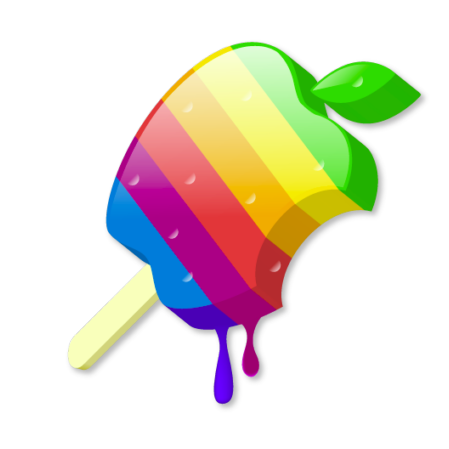

In [11]:
# 이미지 출력 연습
import numpy as np
# wordcloud와 불용어사전 import 
from wordcloud import WordCloud, STOPWORDS
# Python Image Library
from PIL import Image

mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/data/appleBar.png'))
plt.figure(figsize=(8,8))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

- 워드클라우드를 적용할 단어를 생성해줍니다.

In [ ]:
text = ''
for t in range(8):
    text = text + 'C '
for t in range(9):
    text = text + 'JAVA '
for t in range(11):
    text = text + 'JavaScript '
for t in range(18):
    text = text + 'Python '
for t in range(9):
    text = text + 'C++ '
for t in range(12):
    text = text + 'Kotlin '
for t in range(10):
    text = text + 'PHP '
for t in range(18):
    text = text + 'R '
for t in range(6):
    text = text + 'GO '
for t in range(14):
    text = text + 'Scala '
for t in range(13):
    text = text + 'DART '
print(type(text))

<class 'str'>


- wordcloud이미지 나타내기

{'Python Python': 1.0, 'Scala Scala': 0.7647058823529411, 'Kotlin Kotlin': 0.6470588235294118, 'JavaScript JavaScript': 0.5882352941176471, 'PHP PHP': 0.5294117647058824, 'JAVA JAVA': 0.47058823529411764, 'GO': 0.35294117647058826}


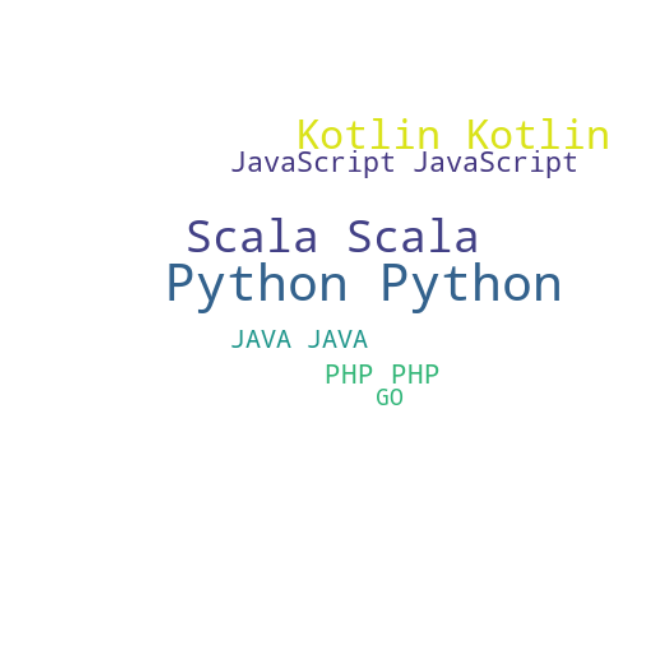

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add('DART')

# 워드 클라우드 만들기
# background_color : 배경색
# max_words : 최대단어수
# mask : 이미지
# stopwords : 불용어 지정
wordcloud = WordCloud(background_color='white', max_words=2000, max_font_size=200, mask=mask,stopwords=stopwords)

# 텍스트를 적용한 wordcloud
wordcloud = wordcloud.generate(text)
# wordcloud.generate_from_frequencies(dict(text))


# 단어별 비율출력
# 최대 빈도수를 가진 단어의 비율이 1.0이다
print(wordcloud.words_)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- 이미지가 나오긴 나왔지만 빈도율이 가장 낮은 GO를 제외한 단어들은 모두 word word의 형태로 나온다. 검색해보니 연어 (Salmon말고 Collocation)라는 효과가  기본 설정되어 있는데 연어란 동일한 맥락에서 일반적인 경우보다 높은 빈도로 나타나는 어휘의 쌍이라는 뜻으로 높은빈도의 단어들을 쌍으로 나타내는 효과를 꺼줘야 한다고 한다.[참고 사이트](https://stackoverflow.com/questions/43954114/python-wordcloud-repetitve-words)

- wordcloud를 생성할 때 collocations=False을 지정해주면 된다.



{'Python': 1.0, 'Scala': 0.7777777777777778, 'Kotlin': 0.6666666666666666, 'JavaScript': 0.6111111111111112, 'PHP': 0.5555555555555556, 'JAVA': 0.5, 'GO': 0.3333333333333333}


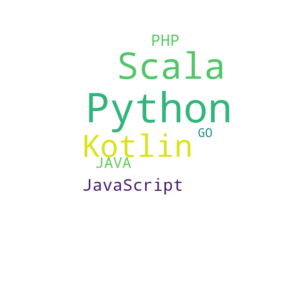

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add('DART')

# 워드 클라우드 만들기
# background_color : 배경색
# max_words : 최대단어수
# mask : 이미지
# stopwords : 불용어 지정
wordcloud = WordCloud(background_color='white', max_words=2000, max_font_size=200, mask=mask,stopwords=stopwords, collocations=False)

# 텍스트를 적용한 wordcloud
wordcloud = wordcloud.generate(text)
# wordcloud.generate_from_frequencies(dict(text))


# 단어별 비율출력
# 최대 빈도수를 가진 단어의 비율이 1.0이다
print(wordcloud.words_)

plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 8.형태소 분석
- 형태소 분석을 하는 이유는 단수, 복수, 과거, 현재진행형, 최상급 등의 문자에 대해 동일한 어근을 갖는 단어 단위로 분할해야 하기 때문입니다.


## 1) WordNetLemmatizer
- 영문 형태소 분석


## 2) konlpy : 한글 형태소 분석
- konlpy 패키지 이용
- Kkma모듈의 sentences(문장 분류), nouns(단어별 분류), pos(형태소 분석)
- Hannaum모듈의 nouns(단어별 분석), morphs(형태소 분석)
- Twitter모듈의 nouns(단어별 분석), morphs(형태소 분석), pos(형태소 분석-품사와 함께 리턴)

### 1) konlpy 패키지 설치

In [ ]:
# colab용 konlpy설치
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy

from konlpy.tag import Twitter

In [13]:
from konlpy.tag import Kkma
kkma = Kkma()

print(kkma.sentences('한국어의 문장 분석. konlpy를 이용합니다.'))
# 한글 사전에 있는 단어만 추출
print(kkma.nouns('한국어의 문장 분석. konlpy를 이용합니다.'))
# 형태소 분석 - 단어별 분할 후, 품사까지 출력
print(kkma.pos('한국어의 문장 분석. konlpy를 이용합니다.'))

['한국어의 문장 분석. konlpy를 이용합니다.']
['한국어', '문장', '분석', '이용']
[('한국어', 'NNG'), ('의', 'JKG'), ('문장', 'NNG'), ('분석', 'NNG'), ('.', 'SF'), ('konlpy', 'OL'), ('를', 'JKO'), ('이용', 'NNG'), ('하', 'XSV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


# 9.동아일보에서 검색한 모든 기사내용을 가지고 워드 클라우드 만들기


## 1) 기사 가져오기

[https://www.donga.com/news/search?p=16&query=%EC%BD%94%EB%A1%9C%EB%82%98&check_news=1&more=1&sorting=1&search_date=1&v1=&v2=&range=1](
https://www.donga.com/news/search?p=16&query=%EC%BD%94%EB%A1%9C%EB%82%98&check_news=1&more=1&sorting=1&search_date=1&v1=&v2=&range=1
)


In [ ]:
# 검색어를 입력받아서 기사 타이틀이 나오는 곳으로 접근해서 기사 개수를 찾아오기
import requests
from bs4 import BeautifulSoup

# 검색어를 한글로 이용하고자 하는 경우 사용
from urllib.parse import quote
# 텍스트 입력받기
keyword = input('검색어를 입력하세요 : ')

# 기사 검색 결과 페이지의 URL
target_URL = 'https://www.donga.com/news/search?p=1&query=' + quote(keyword) + '&check_news=1&more=1&sorting=1&search_date=1&v1=&v2=&range=1'

# html가져오기
source_code_from_URL = requests.get(target_URL)

# 200은 정상결과
print(source_code_from_URL)

print(source_code_from_URL.text)

```html
검색어를 입력하세요 : 추석
<Response [200]>
<!doctype html>
<html lang="ko">
<head>
<title>동아닷컴</title>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta http-equiv="X-UA-Compatible" content="IE=edge" />
<meta name="description" content="대한민국을 대표하는 정론지 동아일보의 디지털 창(窓)으로서 사회의 변화와 다양성을 아우르는 깊이있고 정확한 뉴스를 제공하고 있습니다." />
<meta name="writer" content="동아닷컴" />
<meta name='referrer' content='unsafe-url'>
<meta name='dailymotion-domain-verification' content='dm86e6xoulnfokzid' />
<meta name="facebook-domain-verification" content="nyedn3qpatz7zur9vbmms5epehnszw" />
<link rel="image_src" href="https://image.donga.com/donga2013/images/common/donga_icon.png" />
<link rel="canonical" href="https://www.donga.com/news/search" />

<link rel='stylesheet' type='text/css' href='https://image.donga.com/pc/2020/css/donga_sub.css?t=20210722'>

<link rel="stylesheet" type="text/css" href="https://image.donga.com/donga/css.v.2.0/slick.css"/>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-PCVCHHT');</script>
<!-- End Google Tag Manager -->
<script async src='https://securepubads.g.doubleclick.net/tag/js/gpt.js'></script>
<script>
window.googletag = window.googletag || {cmd: []};
googletag.cmd.push(function() {
googletag.defineSlot('/106061858/donga_news_bigbanner', [[336, 280], [300, 250], [728, 90], [468, 60]], 'div-gpt-ad-1630911028363-0').addService(googletag.pubads());
googletag.pubads().enableSingleRequest();
googletag.pubads().collapseEmptyDivs();
googletag.enableServices();
});
....
```

## 2) 기사 건수 가져오기
- 기사 목록페이지로부터 기사의 총 건수를 가져옵니다.

In [15]:
bs = BeautifulSoup(source_code_from_URL.text, 'html.parser')
# 건수태그 가져오기
cnt = bs.select('.searchCont span')
print(cnt)

# 공백으로 분할
total = cnt[0].getText().split(' ')
# 건수만 가져오기
total = int(total[1])
print('검색어 : ', keyword)
print('기사 건수 : ',total)


[<span>(총 19262 건 검색)</span>, <span class="list_type">
<img onclick="search_more('1', '1', '1', '', '', '1', '1');" src="https://image.donga.com/donga2013/images/sub/chk.png"/> 최신순　
            <img onclick="search_more('1', '2', '1', '', '', '1', '1');" src="https://image.donga.com/donga2013/images/sub/chk_blank.png"/> 오래된순　
            <img onclick="search_more('1', '3', '1', '', '', '1', '1');" src="https://image.donga.com/donga2013/images/sub/chk_blank.png"/> 정확도순
        </span>, <span class="highlight">추석</span>, <span>2021-09-21 15:43</span>, <span class="highlight">추석</span>, <span>2021-09-21 13:26</span>, <span class="highlight">추석</span>, <span class="highlight">추석</span>, <span>2021-09-21 13:13</span>, <span class="highlight">추석</span>, <span>2021-09-21 11:55</span>, <span class="highlight">추석</span>, <span class="highlight">추석</span>, <span>2021-09-21 10:31</span>, <span class="highlight">추석</span>, <span>장연제 동아닷컴  기자</span>, <span>2021-09-21 09:34</span>, <span class="high

- 동아일보는 한페이지당 15개의 기사 목록을 보여주고 있습니다.
- URL의 `p=16 `부분에 각 페이지 맨위에 표시되는 기사의 인덱스를 표시해주고 있습니다
- 검색 결과 페이지에서 데이터 개수를 리턴하는 부분이 어디인지 확인합니다

입력받은 keyword이름으로 txt 파일을 생성하고 기사를 txt파일에 저장합니다

In [16]:
num_article = int(input('읽어올 기사의 개수 : '))

# 읽을 페이지 개수 생성 - 소수를 버리고 정수로 생성
page_num = num_article/15 if num_article%15 == 0 else num_article/15 + 1
page_num = int(page_num)
print('읽어올 페이지수 : ' ,page_num)

## 'keyword'.txt라는 파일을 생성
output_file = open(keyword + '.txt', 'w',encoding='utf-8')

# 기사 개수만큼 읽기
for i in range(page_num):
    p = 1 + i * 15
    target_URL = 'https://www.donga.com/news/search?p='+str(p)+'&query=' + quote(keyword) + '&check_news=1&more=1&sorting=1&search_date=1&v1=&v2=&range=1'
    
    source_code_from_URL = requests.get(target_URL)
    bs = BeautifulSoup(source_code_from_URL.text,'html.parser')
    # print(bs)
    
    # 기사 타이틀가져오기
    titles = bs.select('.searchCont .searchList .t .tit a')
    # print(titles)
    for title in titles:
        
        # 기사 링크를 읽기
        link = title['href'] 
        # print(link)
        
        # 기사 페이지를 읽기
        article = requests.get(link)
        # print(article.text)
        
        # 기사만 가져오기
        article_txt = BeautifulSoup(article.text, 'html.parser')
        
        content = article_txt.select('div.article_txt')
        for c in content:
            print(str(c.find_all(text=True)))
            # 내용을 파일에 저장
            output_file.write(c.text)                     
output_file.close()            


읽어올 기사의 개수 : 24
읽어올 페이지수 :  2
['\n', '추석 당일인 21일 오후부터 전국 주요 고속도로 귀경길 방향에서 극심한 정체가 이어지고 있다.', '이날 한국도로공사에 따르면 오전부터 서서히 시작된 귀경길 정체가 오후 들어 더욱 극심해졌다. 늦은 저녁에서 내일(22일) 새벽께 해소될 것으로 예상된다. ', '서울방향은 이날 오후 3~4시 사이 정체가 절정에 이르다가 내일 새벽 1~2시에 해소되겠다. 지방방향은 오후 3~4시에 최대 혼잡을 보이다가 오후 8~9시 사이에 해소될 것으로 보인다.', '\n', ' ADMARU Donga_DT_NEWS_CV_Video ', '\n', ' ', '주요 노선별로 살펴보면 이날 오후 3시10분 기준 경부고속도로 서울방향은 동대구분기점에서 북대구 부근 12㎞ 구간이 정체다. 또 한곡1교에서 영동1터널까지 8㎞ 구간에서 속도가 더디고 비룡분기점에서 옥산분기점 부근 45㎞ 지점에서 정체가 극심하다. 목천 부근에서 남사까지 46㎞ 부근 속도가 나지 않고, 신갈분기점 부근 2㎞도 정체에 있다. 달래내 부근에서 반포까지 9㎞ 구간도 정체가 이어지고 있다.', '\n', '주요기사', '\n', '\n', '만화는 폰으로 봐야 제맛!…귀경길 꼭 봐야할 ‘웹툰 5選’', '전기차 충전요금은 왜 오를까', '\n', '\n', '부산방향은 한남에서 서초까지 5㎞ 구간이 더딘 편이다. 신갈분기점에서 수원까지 2㎞도 정체이고 오산에서 남사 부근 5㎞, 옥산분기점 부근에서 옥산 7㎞, 금호분기점 부근에서 북대구 8㎞에서 속도를 내지 못하고 있다.', '영동고속도로는 인천방향으로 평창에서 둔내터널 11㎞ 구간이 정체이고, 횡성휴게소에서 새말까지 11㎞ 부근, 여주분기점 부근에서 호법분기점으로 15㎞ 역시 속도가 더딘 편이다. 또 덕평휴게소에서 양지터널로 12㎞ 구간 정체가 나타나고 있고 동수원에서 광교터미널 부근 2㎞ 구간도 정체다. 이 외에 군포에서 반월터널까지 5㎞ 구간, 군자분기점에서 월곶분기점 부근 4㎞도 속도를 내지 

In [ ]:
from konlpy.tag import Twitter

# 파일을 열기
open_text_file = open(keyword+'.txt', 'r',encoding='utf8')

# 파일의 내용읽기
open_text_file = open(keyword+'.txt','r',encoding='utf8')

text = open_text_file.read()
print(text)

```
추석 당일인 21일 오후부터 전국 주요 고속도로 귀경길 방향에서 극심한 정체가 이어지고 있다.이날 한국도로공사에 따르면 오전부터 서서히 시작된 귀경길 정체가 오후 들어 더욱 극심해졌다. 늦은 저녁에서 내일(22일) 새벽께 해소될 것으로 예상된다. 서울방향은 이날 오후 3~4시 사이 정체가 절정에 이르다가 내일 새벽 1~2시에 해소되겠다. 지방방향은 오후 3~4시에 최대 혼잡을 보이다가 오후 8~9시 사이에 해소될 것으로 보인다.

 주요 노선별로 살펴보면 이날 오후 3시10분 기준 경부고속도로 서울방향은 동대구분기점에서 북대구 부근 12㎞ 구간이 정체다. 또 한곡1교에서 영동1터널까지 8㎞ 구간에서 속도가 더디고 비룡분기점에서 옥산분기점 부근 45㎞ 지점에서 정체가 극심하다. 목천 부근에서 남사까지 46㎞ 부근 속도가 나지 않고, 신갈분기점 부근 2㎞도 정체에 있다. 달래내 부근에서 반포까지 9㎞ 구간도 정체가 이어지고 있다.
주요기사

만화는 폰으로 봐야 제맛!…귀경길 꼭 봐야할 ‘웹툰 5選’전기차 충전요금은 왜 오를까

부산방향은 한남에서 서초까지 5㎞ 구간이 더딘 편이다. 신갈분기점에서 수원까지 2㎞도 정체이고 오산에서 남사 부근 5㎞, 옥산분기점 부근에서 옥산 7㎞, 금호분기점 부근에서 북대구 8㎞에서 속도를 내지 못하고 있다.영동고속도로는 인천방향으로 평창에서 둔내터널 11㎞ 구간이 정체이고, 횡성휴게소에서 새말까지 11㎞ 부근, 여주분기점 부근에서 호법분기점으로 15㎞ 역시 속도가 더딘 편이다. 또 덕평휴게소에서 양지터널로 12㎞ 구간 정체가 나타나고 있고 동수원에서 광교터미널 부근 2㎞ 구간도 정체다. 이 외에 군포에서 반월터널까지 5㎞ 구간, 군자분기점에서 월곶분기점 부근 4㎞도 속도를 내지 못하고 있다.강릉방향은 서창분기점에서 월곶분기점 부근 3㎞ 정체가 나타나고 있다. 서해안고속도로는 서울방향 줄포 부근에서 부안 부근까지 12㎞ 구간이 속도가 더디고, 동군산 부근에서 군산 부근 14㎞ 정체다. 또 대천에서 대천 부근 7㎞ 구간이 더딘 편이다. 서산 부근에서 서해대교까지 28㎞ 구간에서 속도를 내지 못하고 서평택분기점 부근에서 화성휴게소까지 11㎞ 구간 역시 정체가 극심하다.오후 4시 요금소 기준으로 승용차를 이용한 주요 도시간 예상 소요시간은 하행선 ▲서울~부산 5시간 ▲서울~대전 2시간20분 ▲서울~대구 4시간 ▲서울~강릉 2시간40분 ▲서울~광주 3시간40분 ▲서울~목포 3시간40분 ▲서울~울산 6시간40분 등이다.상행선은 ▲부산~서울 7시간 ▲대전~서울 4시간40분 ▲대구~서울 6시간 ▲강릉~서울 3시간50분 ▲광주~서울 6시간 ▲목포~서울 7시간20분 ▲울산~서울 6시간40분 등이다.한편 한국도로공사는 이날 전국 고속도로 교통량은 522만대로 예상했다. 수도권에서 지방으로 빠져나가는 차량은 42만대, 지방에서 수도권으로 진입하는 차량은 48만대로 전망했다.﻿[서울=뉴시스] 창닫기기사를 추천 하셨습니다추석 고속도로 ‘절정’…귀경길, 내일 새벽돼야 풀려베스트 추천 뉴스홍준표 “생각 좀 바뀌었다…대통령되면 1년간 文정권 부정부패 청소”국민의힘 지지율 40%, 국정농단 사태 이후 최고치…文·與 소폭 하락‘압구정 한양’ 살던 100억 자산가…‘40년 마약’ 끊게 한 아내의 한마디윤석열 28.8%, 이재명 23.6%…4주 만에 오차범위 내 앞서윤석열 “혼밥하거나 숨지 않겠다” 공약…“秋 스트레스 없었다”엔 ‘거짓말’중국인 1명, 5년간 건강보험 30억원 혜택…외국인 상위 10명중 7명 중국인Copyright by dongA.com All rights reserved. 
        $( document ).ready( function() {
            window.bestPopupObj = Popup( $( '#bestnews_layer' ), {
                    vertical: 'center',  /* top, bottom, center */
                    horizontal: 'center',  /* left, right, center */
                    //effect: 'slide',  /* clip slide blind */
                    //direction: 'left',   /* up, down, left, right */
                    duration: 300,
                    //scroll: true
                } ) ;
          });
    

21일 오전 광주 동구 학동에서 열린 광주 학동 붕괴 참사 희생자 추모식에서 유가족들이 헌화와 분향하고 있다. 2021.9.21/뉴스1 © News1 ﻿21일 오전 광주 동구 학동 붕괴 참사 현장 인근에서 참사 희생자 추모제가 열렸다.유가족들과 김종효 광주시 행정부시장, 민형배·이병훈·이형석·조오섭 국회의원, 임택 동구청장 등이 참석해 희생자들의 넋을 기렸다.참석자들의 묵념으로 시작된 추모제는 참사 이후 첫 명절을 맞은 이진의 유족협의회장이 추모사를 하자 참석한 유족들은 참은 눈물을 터뜨렸다.

...
```

## 3) 말뭉치(corpus) 
- Hannanum - KAIST 말뭉치를 이용해 생성된 사전
- Kkma - 세종 말뭉치를 이용해 생성된 사전 (꼬꼬마)
- Mecab - 세종 말뭉치로 만들어진 CSV형태의 사전
- Komoran- Java로 쓰여진 오픈소스 한글 형태소 분석기
- Twitter(Okt) - 오픈소스 한글 형태소 분석기

Twitter를 이용하여 말뭉치를 출력해봅니다

In [18]:
twitter = Twitter()
nouns = twitter.nouns(text)
open_text_file.close()
print(nouns)

['추석', '당일', '오후', '전국', '주요', '고속도로', '길', '방향', '정체', '날', '한국', '도로공사', '오전', '서서히', '시작', '길', '정체', '오후', '더욱', '저녁', '내일', '새벽', '해소', '것', '예상', '방향', '날', '오후', '사이', '정체', '절정', '내일', '새벽', '해소', '지방', '방향', '오후', '최대', '혼잡', '오후', '사이', '해소', '것', '주요', '노선', '별로', '날', '오후', '기준', '경부', '고속도로', '방향', '분기점', '북', '대구', '부근', '구간', '정체', '또', '곡', '교', '영동', '터널', '구간', '속도', '비룡', '분기점', '옥산', '분기점', '부근', '지점', '정체', '목', '부근', '남사', '부근', '속도', '신갈분기점', '부근', '도', '정체', '부근', '반포', '구간', '정체', '기사', '만화', '폰', '맛', '길', '꼭', '웹툰', '전기차', '충전', '요금', '왜', '부산', '방향', '한남', '서초', '구간', '편이', '신갈분기점', '수원', '도', '정체', '오산', '남사', '부근', '옥산', '분기점', '부근', '옥산', '금호', '분기점', '부근', '북', '대구', '속도', '내지', '못', '고속도로', '인천', '방향', '평창', '둔내터널', '구간', '정체', '횡성휴게소', '말', '부근', '여주', '분기점', '부근', '호법', '분기점', '역시', '속도', '편이', '또', '덕평', '휴게소', '터널', '구간', '정체', '수원', '광교', '터미널', '부근', '구간', '정체', '이', '외', '군포', '반월', '터널', '구간', '군자', '분기점', '월곶', '분기점', '부근', '도', '속도', '내지', '못'

## 4) 단어 개수 확인


In [20]:
import collections
# 단어 개수 확인
count = collections.Counter(nouns)

import nltk
ko = nltk.Text(nouns, name='하이')
print('전체 단어 개수 : ', len(ko.tokens))
print('중복 제거 개수 : ', len(set(ko.tokens)))
print(ko.vocab)

전체 단어 개수 :  9128
중복 제거 개수 :  2198
<bound method Text.vocab of <Text: 하이>>


## 5) 단어의 출현 빈도 확인

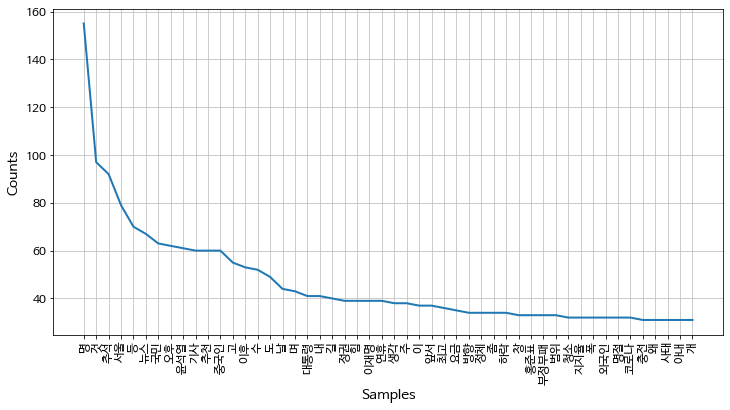

In [21]:
plt.figure(figsize=(12,6))
ko.plot(50) # 50개만 막대 그래프로 출력
plt.show()

## 6) 불용어 제거
직접 불용어사전 리스트를 생성하여 말뭉치에서 제외할 수 있습니다

In [22]:
stop_words=['팀','민','것','김','등','전','석','관','처','급', '해','수','트','명']
ko = [each_word for each_word in ko if each_word not in stop_words]

print(ko)

['추석', '당일', '오후', '전국', '주요', '고속도로', '길', '방향', '정체', '날', '한국', '도로공사', '오전', '서서히', '시작', '길', '정체', '오후', '더욱', '저녁', '내일', '새벽', '해소', '예상', '방향', '날', '오후', '사이', '정체', '절정', '내일', '새벽', '해소', '지방', '방향', '오후', '최대', '혼잡', '오후', '사이', '해소', '주요', '노선', '별로', '날', '오후', '기준', '경부', '고속도로', '방향', '분기점', '북', '대구', '부근', '구간', '정체', '또', '곡', '교', '영동', '터널', '구간', '속도', '비룡', '분기점', '옥산', '분기점', '부근', '지점', '정체', '목', '부근', '남사', '부근', '속도', '신갈분기점', '부근', '도', '정체', '부근', '반포', '구간', '정체', '기사', '만화', '폰', '맛', '길', '꼭', '웹툰', '전기차', '충전', '요금', '왜', '부산', '방향', '한남', '서초', '구간', '편이', '신갈분기점', '수원', '도', '정체', '오산', '남사', '부근', '옥산', '분기점', '부근', '옥산', '금호', '분기점', '부근', '북', '대구', '속도', '내지', '못', '고속도로', '인천', '방향', '평창', '둔내터널', '구간', '정체', '횡성휴게소', '말', '부근', '여주', '분기점', '부근', '호법', '분기점', '역시', '속도', '편이', '또', '덕평', '휴게소', '터널', '구간', '정체', '수원', '광교', '터미널', '부근', '구간', '정체', '이', '외', '군포', '반월', '터널', '구간', '군자', '분기점', '월곶', '분기점', '부근', '도', '속도', '내지', '못', '강릉', '방

## 7) 단어 그래프출력
- `nltk.Text(단어리스트, name='단어리스트의 이름')`

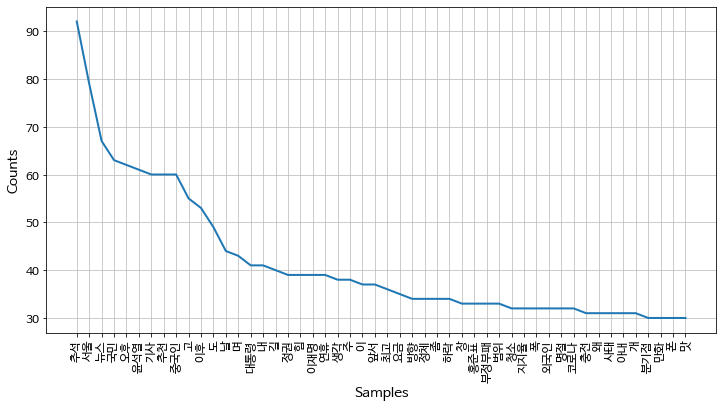

In [24]:
# 단어리스트의 이름 설정
ko = nltk.Text(ko, name='추석')

# 그래프 크기 지정
plt.figure(figsize=(12,6))

# 단어리스트 표시 개수
ko.plot(50)
plt.show()

## 8) 워드 클라우드출력

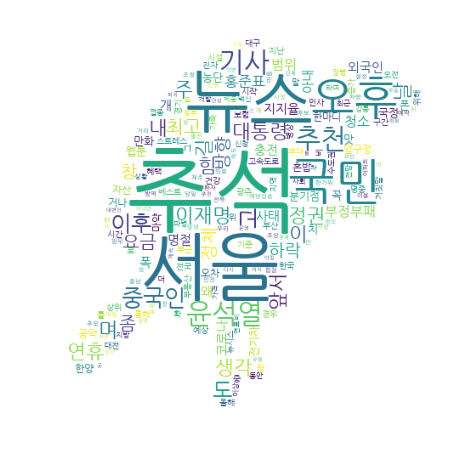

In [25]:
# 최빈값 200개 추출
data = ko.vocab().most_common(200)

# jupyter notebook의 경우
# font_path='../data/NanumBarunGothic.ttf'

# colab의 경우
font_path = '/content/drive/MyDrive/Colab Notebooks/data/NanumGothic.ttf'

# WordCloud생성
wordcloud = WordCloud(font_path=font_path, relative_scaling=0.5, mask=mask,
                     background_color='white'). generate_from_frequencies(dict(data))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 텍스트 분류
- 텍스트 분류에는 주제를 분류하는 것 과 감성 분석이 있습니다.

# 10.주제 분류
- 문서 집합에 숨어있는 주제를 찾아내는 것
- 머신 러닝 기반의 토픽 모델링에 자주 사용되는 기법은 LDA인데 사이킷 런에서도 제공 - 최신 버전에서만 제공
- 텍스트기반의 머신러닝을 추가시켜주고 있습니다.
- 주제 분류에 많이 사용되는 알고리즘은 로지스틱 회귀, SVM(Support Vector Machine), 나이브 베이즈 분류 등입니다.
- boosting 알고리즘을 사용할 수 있지만 학습 시간이 오래 걸립니다.

## 1) 뉴스 데이터 가져오기
- sklearn에서는 토픽 모델링을 실습할 수 있는 20newsgroups라는 데이터를 제공해주는데 2이 데이터셋에는 0개의 주제를 가진 문서들이 존재합니다.
- 이 패키지에서는 단어의 개수를 셀 때 CounterVecorizer만 사용이 가능합니다.
- Tfidf방식은 허용하지 않습니다. 오로지 단어의 개수만 필요합니다.
- 특정 주제에 포함된 단어들을 확인해서 단어들이 많이 포함되어 있으면 특정한 주제라고 판단합니다.
- 앞으로 분류를 하려면 주제를 파악해야 합니다.


In [27]:
# 데이터 확인
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all', random_state = 156)

## 2) 데이터 확인

In [28]:
print(type(news_data)) #자료형 확인
#자료형이 내가 모르는 자료형이라면 dir(데이터)를 이용해서 사용할 수 있는 속성이나
#메소드를 확인
print(dir(news_data))
print(news_data.target_names) #뉴스그룹 주제들

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'filenames', 'target', 'target_names']
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


## 3) 클래스별 개수 확인

In [ ]:
#타겟을 확인
print(pd.Series(news_data.target).value_counts().sort_index())

0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64


In [ ]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

## 4) 학습데이터와 테스트 데이터의 분류
- 이 데이터는 이미 train 과 test로 분할이 되어 있고 headers 나 footers 그리고 quotes 는 예전 뉴스그룹에 사용하던 내용에 대한 정보를 가지고 있는 메타데이터이므로 제거하여 가져옵니다

In [29]:

train_news = fetch_20newsgroups(subset='train', 
                                remove = ('headers', 'footers', 'quotes'), 
                               random_state = 42)

X_train = train_news.data
y_train = train_news.target

test_news = fetch_20newsgroups(subset='test', 
                                remove = ('headers', 'footers', 'quotes'), 
                               random_state = 42)

X_test = test_news.data
y_test = test_news.target

#데이터 타입이 list
print(type(X_train))

<class 'list'>


## 5) 피처 벡터화
- 단어들을 피처로 변환(Count 기반이 있고 TF-IDF 기반 2가지)
- 학습 데이터 와 테스트 데이터 모두 변환해야 하는데 학습 데이터를 변환할 때사용한 객체를 이용해서 테스트 데이터도 변환해야 합니다.
- 별도의 객체로 변환을 하게되면 단어 피처의 개수가 달라지기 때문에 모델을 평가할 수 없게 됩니다.

### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

#피처 벡터화 훈련
count_vectorizer.fit(X_train)
#피처 벡터화 수행
X_train_count_vector = count_vectorizer.transform(X_train)

X_test_count_vector = count_vectorizer.transform(X_test)
#구조 확인
print(X_train_count_vector.shape)

(11314, 101631)


#### 로지스틱 회귀모델 적용

In [ ]:
# 분류 모델 적용
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#로지스틱 회귀 적용
lr_clf = LogisticRegression()
lr_clf.fit(X_train_count_vector, y_train)

pred = lr_clf.predict(X_test_count_vector)

print('정확도:', accuracy_score(y_test, pred))

정확도: 0.608072225172597


### TfidfVectorizer

In [ ]:
# 피처 벡터화 - TF-IDF(하나의 문장에서 여러 번 등장하면 가중치를 부여하고 여러 문장에서 등장하면 페널티를 부여하는 방식)
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()

#피처 벡터화 훈련
tf_idf_vectorizer.fit(X_train)
#피처 벡터화 수행
X_train_count_vector = tf_idf_vectorizer.transform(X_train)

X_test_count_vector = tf_idf_vectorizer.transform(X_test)
#구조 확인
print(X_train_count_vector.shape)


(11314, 101631)


#### 로지스틱 회귀모델 적용

In [ ]:
#로지스틱 회귀 적용
lr_clf = LogisticRegression()
lr_clf.fit(X_train_count_vector, y_train)

pred = lr_clf.predict(X_test_count_vector)

print('정확도:', accuracy_score(y_test, pred))

정확도: 0.6736590546999469


### 불룡어 제거하고 tf_idf_vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#불용어 제거를 하고 ngram을 설정한 후 300번 이상 등장한 단어 제거
tf_idf_vectorizer = TfidfVectorizer(stop_words='english', 
                                    ngram_range=(1,2), max_df=300)

#피처 벡터화 훈련
tf_idf_vectorizer.fit(X_train)
#피처 벡터화 수행
X_train_count_vector = tf_idf_vectorizer.transform(X_train)

X_test_count_vector = tf_idf_vectorizer.transform(X_test)
#구조 확인
print(X_train_count_vector.shape)

#로지스틱 회귀 적용
lr_clf = LogisticRegression()
lr_clf.fit(X_train_count_vector, y_train)

pred = lr_clf.predict(X_test_count_vector)

print('정확도:', accuracy_score(y_test, pred))


(11314, 943453)
정확도: 0.6922464152947424


## 6) 하이퍼파라미터

In [ ]:
# 교차검증을 이용한 최적의 하이퍼 파라미터를 찾아서 수행
from sklearn.model_selection import GridSearchCV

#하이퍼 파라미터를 변경하면서 교차 검증
params = {'C': [0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf, param_grid = params, cv=3, scoring = 'accuracy',
                         verbose=1)

grid_cv_lr.fit(X_train_count_vector, y_train)

print('최적의 파라미터:', grid_cv_lr.best_params)

# 11.한글 감성 분석
- 문장을 긍정 과 부정의 형태로 나누고 각 단어들에 문장의 긍정 과 부정여부에 따라 점수를 부여한 후 새로운 문장을 해석해야 하는 경우 각 단어의 점수를 이용해서 긍정 과 부정을 판단
- 나이브 베이즈 분류를 이용해서 이러한 작업을 수행하는 것이 가능
- 나이브 베이즈나 이런 분류를 이용하는 것과 유사한 형태의 지도학습 기반이 있고 비지도 학습 기반이 있습니다.

    - 지도학습 기반
        - 나는 이 식당이 친절하고 좋아요 ->  긍정

    - 비지도학습 기반
        - 나는 이 식당이 친절하고 좋아요

영어는 lexicon 이라는 감성 어휘 분석 사전을 제공해서 각 어휘마다 감성 여부를 판단할 수 있는 데이터가 제공이 됩니다.
단어별로 긍정 지수 와 부정 지수가 제공됨

## 한글 감성 분석의 종류
- 정규식이나 불용어 사전을 이용해서 불필요한 텍스트를 삭제
- 단어집합을 피처벡터화하기
- 단어의 개수세기


## 네이버 식당 리뷰 데이터를 이용한 감성 분석
- 네이버의 리뷰를 스크래핑 해서 평점을 4이상 부여한 텍스트는 긍정으로 간주하고 4미만은 부정으로 간주해서 만든 텍스트 데이터
- 컬럼은 score(평점), y(긍정 부정 여부로 긍정은 1 부정은 0), ko_text(리뷰 글) 3가지



## 정규식이나 불용어 사전을 이용해서 불필요한 텍스트를 삭제

### 1) 식당리뷰 가져오기

In [26]:
import pandas as pd
# 한글 문서 감성 분석
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/review_data.csv')
print(df)

     score                                             review  y
0        5                                   친절하시고 깔끔하고 좋았습니다  1
1        5                                         조용하고 고기도 굿  1
2        4                             갈비탕과 냉면, 육회비빔밥이 맛있습니다.  1
3        4                         대체적으로 만족하나\n와인의 구성이 살짝 아쉬움  1
4        5                              고기도 맛있고 서비스는 더 최고입니다~  1
..     ...                                                ... ..
540      3                                 추웟어요 고기 외에는 별로에요..  0
541      1  고기질과 육전은 좋다.다만 한우손님 돼지고기 손님을 차별한다(돼지손님은 주차불가.네...  0
542      5          직접 구워주시고 진짜맛있음. 반찬도 맛있음. 직원분이 친절하게 잘해주시네요  1
543      4                           친절하게 서빙해주시고 음식도 챙겨주셨어요 ㅎ  1
544      4  강남역 점례네 방문\n육회비빔밥은 맛있었당\n뼈삼겹도 맛있었다\n\n다만 부산본점이...  1

[545 rows x 3 columns]


### 2) Regular Expression(정규 표현식)을 이용한 불필요한 텍스트 삭제
- Perl 에서 문자열 패턴을 표현하는데 사용하기 위한 언어로 생성했는데 지금은 거의 모든 언어가 지원
- 문자열 검색이나 편집에 이용
- 코드는 간단하지만 가독성이 떨어져서 이해하기 어렵습니다.
- 파이썬에서는 re 라는 모듈로 제공
- 메타문자
    - * : 0번 이상
    - +: 1번 이상
    - ?: 0번 이나 1번
    - {m}: m번 이상
    - {m, n}:m번에서 n 번 이상
    - {m,}: m번 이상

    - .: 줄바꿈 문자를 제외한 1개
    - ^: '~로 시작하는' 인데 [ ] 안에서 사용이 되면 제거한다는 뜻
    - $: '~로 끝나는' 인데 [ ]안에서는 $ 
    - [ ]: 집합인데 [abc] 는 a b c 중 에 하나 0-9 숫자, 한글 - [가-힣], 영문[a-zA-Z]

    - |: 또는

    - (): 그룹

    - \s: 공백문자 - \n, \t, \r
    - \d: 숫자
    - \D: 숫자가 아닌
    - \w: 단어
    - \W: 단어가 아닌

In [ ]:
#앞의 데이터를 한글만 남도록 정제 - cleaning
import re

def text_cleaning(text):
    #한글글자 정규식을 생성
    #^는 [] 바깥에 있을 때는 시작하는 으로 사용되고 [ ] 안에 있을 때는 제외
    hangul = re.compile('[.]+')
    #정규식을 가지고 치환
    #한글이 아닌 것들은 아무것도 없는 걸로 치환됩니다.
    result = hangul.sub('', text)
    return result

df['ko_text'] = df['review'].apply(lambda x:text_cleaning(x))
del df['review']
print(df.head())


   score  y                     ko_text
0      5  1            친절하시고 깔끔하고 좋았습니다
1      5  1                  조용하고 고기도 굿
2      4  1       갈비탕과 냉면, 육회비빔밥이 맛있습니다
3      4  1  대체적으로 만족하나\n와인의 구성이 살짝 아쉬움
4      5  1       고기도 맛있고 서비스는 더 최고입니다~


## 💡Tips.텍스트의 구두점(부호나 기호) 제거

### 방법1 maketrans사용
- translate({A:B..}) :  A를 B로 바꾸겠다
- string.Punctuation: 구두점(따옴표,마침표 물음표)
- [string.maketrans(x, y, z)](https://www.w3schools.com/python/ref_string_maketrans.asp) : 문자x를 문자y 로 바꾸고 z는 제거할 준비를 해주는 함수입니다.  두 문자x와 문자y의 길이가 같아야 합니다.translate함수와 같이 쓰입니다.


### 방법2 for문 사용


In [ ]:
import string

s = '안녕하세요. 반갑습니다.'

# 방법1
# translate는 dict로 입력해도 됩니다.
# maketrns(A, B) : A에 있는 문자를 B의 문자로 치환하는 함수.
out = s.translate(str.maketrans('', '',string.punctuation))

# 방법2
out = ''.join([i for i in s if i not in string.punctuation])

# 방법3
punct = string.punctuation
for c in punct:
    s = s.replace(c,'')

# 방법4 : 정규식표현
#out = re.sub(r'[^\w\s]',s)
#print(out)

## 단어집합을 피처벡터화하기
- 단어의 집합을 만들고 이 집합을 피처벡터로 변환
- `sklearn.feature_exctraction.text.CounterVectorizer`라는 클래스 이용
- tokenzer 라는 파라미터에 전처리할 함수를 대입해주면 됩니다. 


### 1) 학습용 데이터 생성

In [ ]:
from sklearn.feature_extraction.text import  CountVectorizer

# 한글 형태소 분석을 위한 클래스
from konlpy.tag import Okt
def get_pos(x):
    # 형태소 분석기 생성
    tagger = Okt()
    # 문자열을 형태소 분석 - 단어와 품사의 쌍의 list로 생성
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word, tag) for word, tag in pos]

    return pos

# 한글 형태소 분석을 해서 피처화시켜주는 객체를 생성
index_vectorizer = CountVectorizer(tokenizer= lambda x:get_pos(x))
# 훈련 - 형태소 분석기에 있는 단어들만 추출
X = index_vectorizer.fit_transform(df['ko_text'].tolist())
X.shape

(545, 3123)

### 2) 피처 몇개만 확인
'단어/품사':몇번째

In [ ]:
print(str(index_vectorizer.vocabulary_)[:50] + '..')

{'친절하시고/Adjective': 2731, '깔끔하고/Adjective': 526, '..


In [ ]:
print(df['ko_text'][:5])

0              친절하시고 깔끔하고 좋았습니다
1                    조용하고 고기도 굿
2         갈비탕과 냉면, 육회비빔밥이 맛있습니다
3    대체적으로 만족하나\n와인의 구성이 살짝 아쉬움
4         고기도 맛있고 서비스는 더 최고입니다~
Name: ko_text, dtype: object


In [ ]:
print(X[0])

  (0, 2731)	1
  (0, 526)	1
  (0, 2492)	1



## 단어의 개수세기
- 단순하게 단어의 개수를 세는 알고리즘이 2가지 있습니다.
    - TF-IDF : 하나의 문장에서 여러번 등장하면 가중치를 부여하고 여러 문장에서 등장하면 페널티를 제공하는 방식입니다. 은, 는, 이가 처럼 중요하지 않아 어느 문장에서든지 자주 나타는 단어들에 페널티를 제공하는 것입니다.
- sklearn의 TfidfTransformer 사용합니다

1. 피처의 중요도 설정
2. 분류방식 선정 : 감성분석은 회귀가 아닌 분류로 합니다.



### 1) TF-IDF를 이용해서 피처의 중요도 설정

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()

X = tfidf_vectorizer.fit_transform(X)
print(X[0])

  (0, 2731)	0.551052548999187
  (0, 2492)	0.49104748838284784
  (0, 526)	0.6746950810509851


### 2) 분류를 위한 훈련데이터와 학습데이터 생성

In [ ]:
from sklearn.model_selection import train_test_split
y=df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(381, 3123)
(164, 3123)


### 3) 로지스틱 회귀모델를 이용한 분류

In [ ]:
from sklearn.linear_model import LogisticRegression

# 훈련
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

# 예측
y_pred = lr.predict(X_test)
y_pred_probability = lr.predict_proba(X_test)[:,1]

### 4) 평가 지표 확인


In [ ]:
from sklearn.metrics import accuracy_score, precision_score ,recall_score, f1_score

print('정확도:', accuracy_score(y_test, y_pred))
print('정밀도:', precision_score(y_test, y_pred))
print('재현율:', recall_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print('AUC', roc_auc_score(y_test, y_pred_probability))


정확도: 0.926829268292683
정밀도: 0.926829268292683
재현율: 1.0
f1_score: 0.9620253164556963
AUC 0.9078947368421053


### 5) 오차 행렬(분류에서 제대로 분류했는지 확인하는 테이블)을 확인


In [ ]:
from sklearn.metrics import confusion_matrix

cof_matirx = confusion_matrix(y_test, y_pred)
print(cof_matirx)

[[  0  12]
 [  0 152]]


- 오차행렬을 출력해보니 0인 예측데이터가 없는데 **레이블의 편향 때문입니다.**


In [ ]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### 🚩감성분석할 때 주의할 점
- 레이블의 분포 확인 : 분류를 할 때는 전처리 이전에 반드시 특정 레이블에 데이터가 집중되었는지 분포를 확인해봐야 합니다. 
- 샘플링 비율 수정 : 샘플링할 때 언더 샘플링이나 오버 샘플링을 이용해서 샘플링 비율을 수정해야 합니다.

- 원본데이터를 확인해보니 역시나 데이터의 분포가 1에 집중되어 있습니다.

In [ ]:
print(df['y'].value_counts)

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
540    0
541    0
542    1
543    1
544    1
Name: y, Length: 545, dtype: int64>


### 6) 샘플링하고 재훈련

In [ ]:
positive_random_idx = df[df['y'] == 1].sample(50, random_state = 42).index.tolist()
negative_random_idx = df[df['y'] == 0].sample(50, random_state = 42).index.tolist()

# 인덱스 합치기
random_idx = positive_random_idx + negative_random_idx

sample_X = X[random_idx, :]
y = df['y'][random_idx]

(70, 3123)
(30, 3123)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sample_X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

# 훈련
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

# 예측
y_pred = lr.predict(X_test)
y_pred_probability = lr.predict_proba(X_test)[:,1]

(70, 3123)
(30, 3123)


### 7) 성능지표 확인
- 성능지표를 출력해보니 샘플링을 하기 전보다 성능이 떨어지게 됩니다.

In [ ]:
print('정확도:', accuracy_score(y_test, y_pred))
print('정밀도:', precision_score(y_test, y_pred))
print('재현율:', recall_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print('AUC', roc_auc_score(y_test, y_pred_probability))


정확도: 0.7
정밀도: 0.7692307692307693
재현율: 0.625
f1_score: 0.6896551724137931
AUC 0.8214285714285714


- 오차행렬을 출력해보니 예측0인 경우도 잘 나오고 있습니다.

In [ ]:
cof_matirx = confusion_matrix(y_test, y_pred)
print(cof_matirx)

[[11  3]
 [ 6 10]]


### 8) 회귀계수 출력
- 회귀계수 : 독립변수(feature)가 한 단위 변화함에 따라 종속변수(label)에 미치는 영향력 크기
- 영향력의 크기이므로 피처의 중요도라고도 할 수 있습니다.


In [ ]:
print('회귀계수가 높은 것 5개')
print(sorted(((value, index) for index, value in  enumerate(lr.coef_[0])),reverse = True)[:5])
print('# 회귀계수가 낮은 것 5개')
print(sorted(((value, index) for index, value in  enumerate(lr.coef_[0])), reverse=False)[:5])

회귀계수가 높은 것 5개
[(0.5049185859497618, 1054), (0.489669127261126, 1110), (0.41332804852705146, 816), (0.38437620311673504, 2294), (0.35360894891864575, 1106)]
# 회귀계수가 낮은 것 5개
[(-0.7363040012616839, 2158), (-0.5100165140632658, 1073), (-0.44636961994997504, 2159), (-0.40064631687415114, 2403), (-0.39553349114386294, 497)]


vocabulary_ : 문서-단어 행렬에서 각각의 열(column)이 의미

In [ ]:
# # 회귀계수가 높은 순서대로 단어를 출력
# coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])),reverse = True)

# 회귀 모델의 계수를 이용해서 어떤 형태소인지 알아내기
invert_index_vectorizer = {v:k for k,v in index_vectorizer.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100] + '..')

coef_neg_index =sorted(((value, index) for index, value in  enumerate(lr.coef_[0])), reverse=True)

# 회귀 모델의 계수를 이용해서 어떤 형태소인지 알아내기
invert_index_vectorizer = {v:k for k,v in index_vectorizer.vocabulary_.items()}
print(str(invert_index_vectorizer)[-100:] + '..')

{2731: '친절하시고/Adjective', 526: '깔끔하고/Adjective', 2492: '좋았습니다/Adjective', 2446: '조용하고/Adjective', 33..
점례/Noun', 642: '네/Josa', 1119: '맛있었당/Adjective', 1464: '부산/Noun', 2190: '이랑은/Josa', 2823: '틀림/Noun'}..


In [ ]:
invert_index_vectorizer

```
{2731: '친절하시고/Adjective',
 526: '깔끔하고/Adjective',
 2492: '좋았습니다/Adjective',
 2446: '조용하고/Adjective',
 333: '고기/Noun',
 816: '도/Josa',
 427: '굿/Noun',
 221: '갈비탕/Noun',
 357: '과/Josa',
 626: '냉면/Noun',
 15: ',/Punctuation',
 ...
 ```

# HTML 데이터 스크래핑과 파싱
1. 스크래핑
- requests : 정적인 데이터 - 변하지 않는 데이터(ajax나 로그인을 사용하지 않는 데이터)
- selenium : ajax나 login 이 필요한 데이터

2. 파싱
- beatifulsoup이용


# 네이버 영화 리뷰 감성 분석
- csv 파일에 id, document. label의 형태로 저장
- id가 영화의 구별id이고 document가 리뷰, label이 감성 부정이 0, 긍정이 1
- 텍스트 데이터의 구분자는 탭(옛날데이터들은 탭 구분자가 많습니다.)


### 1) 데이터 읽어오기

In [35]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/naver_movie/ratings_train.txt', sep='\t')
print(train_df.head())
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/naver_movie/ratings_test.txt', sep='\t')
print(test_df.head())

         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
        id                                           document  label
0  6270596                                                굳 ㅋ      1
1  9274899                               GDNTOPCLASSINTHECLUB      0
2  8544678             뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아      0
3  6825595                   지루하지는 않은데 완전 막장임... 돈주고 보기에는....      0
4  6723715  3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??      0


### 2) 분포 확인
 - 비율이 한쪽으로 쏠려있지 않은지 확인합니다.
 - 비율이 맞지 않으면 오버 샘플링이나 언더 샘플링을 해야 합니다.

In [36]:
print(train_df['label'].value_counts())
print(test_df['label'].value_counts())

0    75173
1    74827
Name: label, dtype: int64
1    25173
0    24827
Name: label, dtype: int64


In [ ]:
print(train_df['document'].head())
print(test_df['document'].head())

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object


### 3) 한글 전처리



#### 결측치 처리
- None을 공백으로 변환하기

In [37]:
train_df = train_df.fillna(' ')
test_df = test_df.fillna(' ')

#### 숫자형 데이터 처리
- 숫자를 전부 공백으로 치환

In [38]:
import re
# 문자열을 사용할 때 r이나 b 를 앞에 붙이는 경우가 있는데 이 경우는 
# 문자열을 있는 그대로 해석해 달라고 하는 것입니다.
# \d는 숫자를 공백으로 치환
train_df['document'] = train_df['document'].apply(lambda x:re.sub(r'[\d+\.]',' ',x))
train_df['document']

test_df['document'] = test_df['document'].apply(lambda x:re.sub(r'[\d+\.]',' ',x))
test_df['document']

0                                                      굳 ㅋ
1                                     GDNTOPCLASSINTHECLUB
2                   뭐야 이 평점들은     나쁘진 않지만   점 짜리는 더더욱 아니잖아
3                         지루하지는 않은데 완전 막장임    돈주고 보기에는    
4         D만 아니었어도 별 다섯 개 줬을텐데   왜  D로 나와서 제 심기를 불편하게 하죠??
                               ...                        
49995            오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함
49996         의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO
49997                   그림도 좋고 완성도도 높았지만    보는 내내 불안하게 만든다
49998       절대 봐서는 안 될 영화   재미도 없고 기분만 잡치고   한 세트장에서 다 해먹네
49999                                           마무리는 또 왜이래
Name: document, Length: 50000, dtype: object

### 4) 한글 형태소 분석을 위한 함수생성

In [39]:
from konlpy.tag import Twitter
twitter = Twitter()

def tw_tokenizer(text) :
    tokens_ko = twitter.morphs(text)
    return tokens_ko

### 5) 피처 벡터화
- 조금 시간이 걸림.문서가 많거나 단어가 많으면 오래 걸립니다.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# ngraom_range : 최소,최대
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2),
                             min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

### 6) 로지스틱 회귀모델 수행

In [ ]:
# 로지스틱 회귀 수행
lr = LogisticRegression(random_state=42)
lr.fit(tfidf_matrix_train, train_df['label'])

### 7) 평가


In [ ]:
tfidf_matrix_test = tfidf_vect.fit(test_df['document']) 
preds = lr.predict(tfidf_matrix_test)
print(accuracy_score(test_df['label']))

### 8) 하이퍼파라미터 튜닝
실제 분류 모델을 만들 때는 최적의 하이퍼 파라미터를 찾아야 합니다.

In [ ]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(random_state=42)
params = {'C' : {1, 3.5, 4.5, 5.5, 10}}
grid_cv = GridSearchCV(lr, param_grid=params, cv=3, scoring='accuracy',
                       verbose=1)

grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, grid_cv.best_score)

### 9) 평가 지표를 확인

In [ ]:
tfid_matrix_test = tfidf_vect.transform(test_df['document'])
best_estimater = grid_cv.best_estimator_
print('정확도:', accuracy_score(test_df['label'],preds))

# ==============================복습=====================================

# 토픽 모델링
- 문서 집합에 숨어있는 주제를 찾아내는 것
- 머신 러닝 기반의 토픽 모델링에 자주 사용되는 기법은 LDA인데 사이킷 런에서도 제공 - 최신 버전에서만 제공
- 텍스트기반의 머신러닝을 추가시켜주고 있습니다.
- sklearn에서는 토픽 모델링을 실습할 수 있는 20newsgroups라는 데이터를 제공해주는데 2이 데이터셋에는 0개의 주제를 가진 문서들이 존재합니다.
- 이 패키지에서는 단어의 개수를 셀 때 CounterVecorizer만 사용이 가능합니다.
- Tfidf방식은 허용하지 않습니다. 오로지 단어의 개수만 필요합니다.


# 뉴스주제 이용
- 특정 주제에 포함된 단어들을 확인해서 단어들이 많이 포함되어 있으면 특정한 주제라고 판단합니다.
- 앞으로 분류를 하려면 주제를 파악해야 합니다.

In [ ]:
from sklearn.datasets import fetch_20newsgroups

cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
         'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics']

news_df = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'),
                             categories=cats,random_state=42)

# 새로운 데이터를 읽어올 때는 type으로 데이터 타입을 출력해보는데 
# 만약에 모르는 자료형이면 dir을 수행하여 어떤 메소드를 사용할 수 있는지 확인합니다.
# Bunch는 sklearn의 데이터 타입 - data, target, target_name으로 구성
print(type(news_df))
print(dir(news_df))

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'filenames', 'target', 'target_names']


# 피처 벡터화
- 단어들을 피처로 만들어서 수치화합니다. 
- tfidf방식이 아니라 CountVectorizer를 사용해서 구현해보겠습니다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2,
                             stop_words='english', ngram_range=(1,2))

fect_vect = count_vect.fit_transform(news_df.data)
# 단순한 출현 빈도가 출력됩니다.
# Tfidf는 소수로 중요도를 출력합니다.
print(fect_vect)

  (0, 492)	1
  (0, 701)	2
  (0, 130)	1
  (0, 988)	1
  (0, 709)	1
  (0, 604)	1
  (0, 326)	1
  (0, 233)	1
  (0, 93)	1
  (0, 428)	1
  (1, 492)	1
  (1, 701)	1
  (1, 553)	1
  (1, 19)	1
  (1, 20)	1
  (1, 21)	1
  (1, 483)	1
  (1, 919)	4
  (1, 232)	2
  (1, 991)	6
  (1, 616)	2
  (1, 214)	2
  (1, 706)	1
  (1, 463)	1
  (1, 88)	1
  :	:
  (6869, 631)	1
  (6869, 669)	1
  (6869, 133)	1
  (6870, 551)	1
  (6870, 270)	1
  (6870, 149)	1
  (6870, 864)	1
  (6870, 994)	1
  (6870, 382)	1
  (6870, 536)	1
  (6870, 70)	1
  (6870, 722)	1
  (6870, 995)	1
  (6870, 251)	1
  (6870, 433)	2
  (6871, 428)	1
  (6871, 713)	1
  (6871, 610)	1
  (6871, 111)	1
  (6871, 876)	1
  (6871, 535)	1
  (6871, 95)	1
  (6871, 67)	1
  (6871, 455)	1
  (6871, 613)	1


## 토픽 모델링
- 8개의 그룹으로 나누고 단어가 1000개 이므로 8*1000

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(fect_vect)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=8, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

## 구조 확인
- 8개의 그룹으로 나누고 단어가 1000개 이므로 8*1000
- lda.components_에는 각 단어가 어떤 토픽에 속할지에 대한 확률이 저장되어 있습니다.

In [ ]:
print(lda.components_.shape)

(8, 1000)


In [ ]:
lda.components_

array([[2.70785093e+02, 3.58541994e+00, 1.71673122e+02, ...,
        3.19242118e+01, 5.12795232e+00, 1.25034111e-01],
       [6.28898164e+00, 3.22990897e+02, 1.25069011e-01, ...,
        1.64240537e+02, 2.77145259e+01, 1.25031849e-01],
       [5.84287265e+01, 1.25059142e-01, 1.57615064e+00, ...,
        1.36536501e-01, 1.25012890e-01, 1.22767171e+02],
       ...,
       [1.25589342e-01, 1.25064786e-01, 1.25000359e-01, ...,
        1.25136998e-01, 6.41147907e+01, 1.25005474e-01],
       [1.25308891e-01, 4.77343130e+00, 1.25368991e-01, ...,
        2.78628348e+01, 3.06401404e+01, 1.25103393e-01],
       [1.26937632e-01, 4.76531259e+01, 1.25159066e-01, ...,
        3.20700897e-01, 4.85606161e+01, 1.78284969e+00]])

- 특정 주제들은 어떤 단어들로 묶여 있을 것이므로 그 단어들을 추출해봅시다.


In [ ]:
# 토픽별 연관도가 높은 단어를 추출해서 출력해주는 함수
def display_topics(model, feature_names, no_top_words):
    # 토픽인덱스, 벡터화한 토픽피처
    for topic_index, topic in enumerate(model.components_):

        # 가장 큰 값의 인덱스 찾기
        topic_word_indexes = topic.argsort()[::-1]
        # no_top_words 만큼의 인덱스를 추출
        top_indexes = topic_word_indexes[:no_top_words]

        # 피처 이름을 이어 붙이기
        feature_concat = ','.join([feature_names[i] for i in top_indexes])
        print(feature_concat)


## 피처 이름 만들기

In [ ]:
feature_names = count_vect.get_feature_names()
print(feature_names)


['00', '000', '01', '02', '03', '04', '05', '10', '100', '11', '12', '128', '13', '14', '15', '16', '17', '18', '19', '1990', '1992', '1993', '20', '200', '21', '22', '23', '24', '24 bit', '25', '256', '26', '27', '28', '29', '30', '300', '31', '32', '3d', '40', '44', '50', '500', '60', '80', '800', '90', '91', '92', '93', 'ability', 'able', 'ac', 'accept', 'access', 'according', 'account', 'act', 'action', 'actions', 'acts', 'actually', 'adam', 'add', 'added', 'addition', 'address', 'adl', 'advance', 'ago', 'agree', 'al', 'allow', 'allowed', 'allows', 'american', 'amiga', 'analysis', 'anonymous', 'anonymous ftp', 'answer', 'answers', 'anti', 'anybody', 'apartment', 'app', 'apparently', 'appear', 'appears', 'application', 'applications', 'apply', 'appreciate', 'appreciated', 'appropriate', 'april', 'arab', 'arabs', 'archive', 'area', 'aren', 'argic', 'argument', 'armenia', 'armenian', 'armenians', 'army', 'art', 'article', 'articles', 'ask', 'asked', 'assume', 'attack', 'attempt', 'aut

# 토픽별 가장 연관도가 높은 단어 추출
토필 모델 lda를 8개의 그룹으로 만들었으므로 8줄이 나오고 토픽에 연관된 단어를 15개씩 선정했으므로 15개 단어가 8줄 나오게 됩니다

In [ ]:
display_topics(lda,feature_names,15)

[2.70785093e+02 3.58541994e+00 1.71673122e+02 2.45720195e+02
 2.51593703e+02 2.41183607e+02 1.58264884e+02 1.21923862e+02
 2.42705610e+01 3.52321336e+01 2.05412665e+01 1.59393863e+00
 1.85422655e+01 1.34242501e+01 1.04313225e+01 9.52577259e+00
 1.31097677e-01 1.95584265e+01 1.15820519e+01 4.83407686e-01
 8.85349883e+00 2.84272007e+01 7.25376189e+00 4.85024287e+00
 1.01515344e+01 7.24231604e+00 4.61254242e+00 5.83684028e+00
 1.25102566e-01 2.24378257e+01 2.01679336e+01 6.65687044e+00
 1.18126696e+00 6.95476449e+00 3.12311557e+00 2.83281400e+00
 6.26922656e+00 1.25552326e-01 1.26643877e+01 1.27158782e-01
 3.61863072e-01 4.90841124e-01 1.31943651e+01 2.98633274e+01
 8.27378556e+00 7.67185335e+00 1.71172279e+01 2.28212688e+01
 2.43005246e+01 2.28927494e+01 7.75857521e+00 9.38513270e-01
 6.97277223e+01 3.66607509e+01 7.41600853e+00 3.74610056e+01
 6.98532167e+00 1.57485606e+00 3.90908699e+00 3.88915708e+01
 2.20485283e+01 9.45357589e-01 6.09442968e+01 1.25000004e-01
 5.97433489e+01 2.385128

## 문서 군집화
- 비슷한 텍스트 구성의 문서를 군집화할 수 있음
- 문서의 레이블이 필요 없는 비지도 학습
1. uci 저장소에서 군집에 필요한 데이터를 저장합니다.
-51개의 텍스트 파일로 구성되어 있으며 각 파일은 Tripadvisor(호텔), Edmunds.com(자동차), Amazon.com(전자제품) 사이트에서 가져온 리뷰 문서 
- 각 문서는 약 100개 정도의 문장을 가지고 있습니다.
<br>
<br>
<br>

### 1.특정 디렉토리에 존재하는 모든 텍스트 파일읽어오기
- os.path.join(path, '*.data') : path디렉토리에 있는 모든 .data파일의 조건을 생성합니다.
- glob.glob() : 조건에 맞는 파일의 경로를 리스트로 가져옵니다


In [ ]:
import glob, os

# 문서 디렉토리 설정
path = '/content/drive/MyDrive/Colab Notebooks/data/OpinosisDataset1.0/topics'

# 모든 파일 경로를 리스트로 저장
all_files = glob.glob(os.path.join(path, '*.data'))
print( all_files[:5])

['/content/drive/MyDrive/Colab Notebooks/data/OpinosisDataset1.0/topics/speed_garmin_nuvi_255W_gps.txt.data', '/content/drive/MyDrive/Colab Notebooks/data/OpinosisDataset1.0/topics/sound_ipod_nano_8gb.txt.data', '/content/drive/MyDrive/Colab Notebooks/data/OpinosisDataset1.0/topics/seats_honda_accord_2008.txt.data', '/content/drive/MyDrive/Colab Notebooks/data/OpinosisDataset1.0/topics/screen_ipod_nano_8gb.txt.data', '/content/drive/MyDrive/Colab Notebooks/data/OpinosisDataset1.0/topics/satellite_garmin_nuvi_255W_gps.txt.data']


### 2.파일이름과 파일의 내용을 저장

In [ ]:
filename_list = []
opinion_text = []

# 파일들을 순회
for file_ in all_files:
    # 파일을 읽어서 DataFrame생성
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')

    # 파일이름 가공 
    # windows이면 / 대신에 \\을 설정
    # /로 자르고 배열 제일 마지막에 있는 파일명을 가져옴
    filename = file_.split('/')[-1]
    # .data확장자 제거
    filename = filename.split('.')[0]
#    print(filename)

    # 파일 이름과 내용 저장
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 컬럼명 : filename, opinion_text
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

print(document_df.head())
    


                         filename                                       opinion_text
0      speed_garmin_nuvi_255W_gps                                                ...
1             sound_ipod_nano_8gb      headphone jack i got a clear case for it a...
2         seats_honda_accord_2008                                                ...
3            screen_ipod_nano_8gb                                                ...
4  satellite_garmin_nuvi_255W_gps                                                ...


# 자연어 처리 복습

## 영문에서 단어나 문장 분할

## nltk.word_tokenize
- 하나의 문장을 단어 단위로 분할 : 

## nltk.set_tokenize
- 여러 줄의 텍스트를 문장 단위로 분할


# 형태소 분석
- 형태소 분석을 하는 이유는 단수, 복수, 과거, 현재진행형, 최상급 등의 문자에 대해 동일한 어근을 갖는 단어 단위로 분할해야 하기 때문입니다.

## WordNetLemmatizer
- 영문 형태소 분석

## konlpy
- 한글 형태소 분석


- 영문에서 구두점을 제거하고 형태소 분석을 해보겠습니다

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string


# 구두점 목록과 치환할 문자열을 dict로 만들기
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
print(remove_punct_dict)

lemmar = WordNetLemmatizer()


## 단어 토큰화
## 문자열을 받아서 WordNetLemmatizer로 단어 토큰 단위로 분할해 주는 함수
def lemTokens(tokens):
    # lemmatize(단어, 단어 형태)
    return [lemmar.lemmatize(token) for token in tokens]

## 문자의 구두점을 제거하고 형태소 분석을 수행해주는 함수
def lemNomalize(text):
    return lemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

{33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 123: None, 124: None, 125: None, 126: None}


## 단어의 개수 세기
- 파일내용 속 단어의 개수를 세봅시다
- TfidfVectorizer : 피처 벡터화

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(tokenizer=lemNomalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])


## 문서 군집
- KMeans를 이용하여 각 파일내용의 단어들을 가지고 5개의 그룹으로 파일을 군집화 해보겠습니다.

In [ ]:
from sklearn.cluster import KMeans

# 5개로 군집하는 모델객체 생성
km_cluster = KMeans(n_clusters=5, max_iter=10000,random_state=42)
km_cluster.fit(feature_vect)
# 각 그룹의 이름
cluster_label = km_cluster.labels_
# 각 그룹의 중심점
cluster_centers = km_cluster.cluster_centers_
print(cluster_centers.shape)

(5, 4611)


In [ ]:
document_df['cluster_label'] = cluster_label
print(document_df.shape)
print(document_df.head())

(51, 3)
                         filename  ... cluster_label
0      speed_garmin_nuvi_255W_gps  ...             1
1             sound_ipod_nano_8gb  ...             1
2         seats_honda_accord_2008  ...             0
3            screen_ipod_nano_8gb  ...             1
4  satellite_garmin_nuvi_255W_gps  ...             1

[5 rows x 3 columns]


- 0번 클러스터에 속하는 파일명을 확인해봅니다

In [ ]:
print(document_df[document_df['cluster_label'] == 0].sort_values(by='filename'))

                          filename  ... cluster_label
34       comfort_honda_accord_2008  ...             0
33       comfort_toyota_camry_2007  ...             0
20   gas_mileage_toyota_camry_2007  ...             0
22      interior_honda_accord_2008  ...             0
23      interior_toyota_camry_2007  ...             0
18       mileage_honda_accord_2008  ...             0
17   performance_honda_accord_2008  ...             0
9        quality_toyota_camry_2007  ...             0
2          seats_honda_accord_2008  ...             0
46  transmission_toyota_camry_2007  ...             0

[10 rows x 3 columns]


## 3개 클러스터로 군집화
- 군집을 3개로 줄여보겠습니다
- n_clusters에 3을 설정하면 됩니다.

In [ ]:
from sklearn.cluster import KMeans

# 3개로 군집하는 모델객체 생성
km_cluster = KMeans(n_clusters=3, max_iter=10000,random_state=42)
km_cluster.fit(feature_vect)

# 각 그룹의 이름
cluster_label = km_cluster.labels_
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

# 각 그룹의 중심점
cluster_centers = km_cluster.cluster_centers_

print(cluster_centers.shape)

(3, 4611)


In [ ]:
print(document_df[document_df['cluster_label'] == 0].sort_values(by='filename'))

                          filename  ... cluster_label
34       comfort_honda_accord_2008  ...             0
33       comfort_toyota_camry_2007  ...             0
20   gas_mileage_toyota_camry_2007  ...             0
22      interior_honda_accord_2008  ...             0
23      interior_toyota_camry_2007  ...             0
18       mileage_honda_accord_2008  ...             0
17   performance_honda_accord_2008  ...             0
9        quality_toyota_camry_2007  ...             0
2          seats_honda_accord_2008  ...             0
46  transmission_toyota_camry_2007  ...             0

[10 rows x 3 columns]


## 문장의 유사도 측정
- 문장의 유사도 측정은 각 문장을 벡터로 만들어서 다른 문작과 거리를 측정하는 개념을 사용합니다
- 이때는 벡터의 크기보다는 벡터의 방향성을 가지고 수행하는 이 벡터의 사잇각을 구해서 유사한 지 수치로 나타내게 되는데 이 때 사용되는 수치를 코사인 유사도라고 합니다.
- 챗봇은 사용자의 질의에 응답을 미리 만들어 두었다가 답변을 하게 되는데 사용자의 질의가 반드시 이전에 있던 것과 동일하지는 않기 때문에 이 경우에는 문장의 유사도를 계산해서 가장 가까운 문장을 추천해야 합니다.
- 직접 코사인 유사도를 계산하거나 sklearn 의 metrics.pairwise.cosine_similarity함수를 이용해서 측정가능합니다.
- 코사인 유사도를 계산하기 전에 피처 벡터화를 수행해야 합니다

## 코사인 유사도를 직접계산하는 함수 만들기


In [ ]:
# 2개의 데이터를 받아서 코사인 유사도를 측정하는 함수
def cos_similarity(v1, v2):

    # np.dot : numpy array를 곱할 때 사용합니다
    dot_product = np.dot(v1, v2)
    # 유클리디안 거리 구하기
    # np.square : 제곱계산
    # np.sqrt : 제곱근계산
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))

    # 행렬의 곱을 유클리디안 거리로 나눈 값이 코사인 유사도가 된다
    similarity = dot_product / l2_norm
    return similarity

## 영문의 유사도 측정
- 위에서 만든 코사인유사도 함수로 영문의 유사도를 측정해보겠습니다.


In [ ]:
doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

# 피처 벡터화
tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [ ]:
# 피처 벡터화된 데이터는 희소행렬이므로 밀집행렬로 변환
# 거리 계산할 때는 밀집행렬을 사용해야 합니다.
feature_vect_dense = feature_vect_simple.todense()

# 각 문장들을 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)

# 고사인 유사도 측정
similarity_simple = cos_similarity(vect1, vect2)
print('문장1과 문장2의 유사도:', similarity_simple)

# 문장2와 문장3이 비교적 유사한 단어가 많아서 유사도가 높게 측정됨
similarity_simple = cos_similarity(vect2, vect3)
print('문장2과 문장3의 유사도:', similarity_simple)

similarity_simple = cos_similarity(vect1, vect3)
print('문장1과 문장3의 유사도:', similarity_simple)

문장1과 문장2의 유사도: 0.40207758214950134
문장2과 문장3의 유사도: 0.45647296026166395
문장1과 문장3의 유사도: 0.4042504477594862


## sklearn제공 코사인유사도
- cosine_similarity(문장1, 문장2)
- 밀집행렬로 변환할 필요가 없어서 더 편리합니다

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 문장1과 문장2의 유사도와 문장1과 문장3의 유사도
result = cosine_similarity(feature_vect_simple[0],feature_vect_simple[1:])
print(result)

# 문장간의 유사도를 행렬로 출력
result = cosine_similarity(feature_vect_simple,feature_vect_simple)
print(result)

[[0.40207758 0.40425045]]
[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]


## 한글 문서의 유사도 측정

In [ ]:
contents = ['우리 과일 먹으러 가자', '나는 고기를 먹으러 갈꺼야',
            '난 산책을 하러 갈꺼야', '나는 공부를 하는게 나을 것 같아',
            '나는 오침을 할꺼야']

## 형태소 분류

In [ ]:
twitter = Twitter()
contents_tokens = [twitter.morphs(row) for row in contents]
print(contents_tokens)

[['우리', '과일', '먹으러', '가자'], ['나', '는', '고기', '를', '먹으러', '갈꺼야'], ['난', '산책', '을', '하러', '갈꺼야'], ['나', '는', '공부', '를', '하는게', '나을', '것', '같아'], ['나', '는', '오침', '을', '할꺼야']]


## 단어 단위의 문장으로 변환

In [ ]:
content_for_vectorize=[]

for content in contents_tokens:
    sentence =''
    for word in content:
        sentence = sentence + ' ' + word
    content_for_vectorize.append(sentence)
print(content_for_vectorize)

[' 우리 과일 먹으러 가자', ' 나 는 고기 를 먹으러 갈꺼야', ' 난 산책 을 하러 갈꺼야', ' 나 는 공부 를 하는게 나을 것 같아', ' 나 는 오침 을 할꺼야']


## 피처 벡터화
- 형태소 분류된 문장을 수치화합니다.
- TfidfVectorizer 또는 CountVectorizer 둘 중에 아무거나 사용해도 됩니다

## CountVectorizer로 벡터화

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#min_df : 너무 낮은 빈도수를 갖는 단어를 제거하기 위해서 설정
count_vect = CountVectorizer(min_df=1)
count_X = count_vect.fit_transform(content_for_vectorize)
print(count_X)

  (0, 10)	1
  (0, 5)	1
  (0, 7)	1
  (0, 0)	1
  (1, 7)	1
  (1, 3)	1
  (1, 1)	1
  (2, 1)	1
  (2, 8)	1
  (2, 12)	1
  (3, 4)	1
  (3, 11)	1
  (3, 6)	1
  (3, 2)	1
  (4, 9)	1
  (4, 13)	1


어떤 단어가 있고 없는지 확인이 불가능하므로 feature의 이름을 출력해봅니다

In [ ]:
print(count_vect.get_feature_names())
print(count_X.toarray())

['가자', '갈꺼야', '같아', '고기', '공부', '과일', '나을', '먹으러', '산책', '오침', '우리', '하는게', '하러', '할꺼야']
[[1 0 0 0 0 1 0 1 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 1]]


## TfidfVectorizer로 벡터화

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(min_df=1)
tfid_X = tfidf_vect.fit_transform(content_for_vectorize)
print(tfid_X)
print(tfidf_vect.get_feature_names())
print(tfid_X.toarray())

  (0, 0)	0.5233582502695435
  (0, 7)	0.4222421409859579
  (0, 5)	0.5233582502695435
  (0, 10)	0.5233582502695435
  (1, 1)	0.5317722537280788
  (1, 3)	0.6591180018251055
  (1, 7)	0.5317722537280788
  (2, 12)	0.6141889663426562
  (2, 8)	0.6141889663426562
  (2, 1)	0.49552379079705033
  (3, 2)	0.5
  (3, 6)	0.5
  (3, 11)	0.5
  (3, 4)	0.5
  (4, 13)	0.7071067811865475
  (4, 9)	0.7071067811865475
['가자', '갈꺼야', '같아', '고기', '공부', '과일', '나을', '먹으러', '산책', '오침', '우리', '하는게', '하러', '할꺼야']
[[0.52335825 0.         0.         0.         0.         0.52335825
  0.         0.42224214 0.         0.         0.52335825 0.
  0.         0.        ]
 [0.         0.53177225 0.         0.659118   0.         0.
  0.         0.53177225 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.49552379 0.         0.         0.         0.
  0.         0.         0.61418897 0.         0.         0.
  0.61418897 0.        ]
 [0.         0.         0.5        0.         0.5        0.
  0.5        0.

# 테스트 데이터 생성
- 비교 가능한 형태로 만들기 : 형태소 분석 -> 단어단위의 문장 생성 -> 피처 벡터화

## 형태소 분석

In [ ]:
# 테스트할 문장
new_post=['우리 과일 먹으로 갈까나']

# 형태소분석
new_post_tokens = [twitter.morphs(row) for row in new_post]

# print(new_post_tokens)


new_post_for_vectorize=[]

for content in new_post_tokens:
    sentence =''
    for word in content:
        sentence = sentence + ' ' + word
    new_post_for_vectorize.append(sentence)
print(new_post_for_vectorize)



[' 우리 과일 먹으로 갈까 나']


In [ ]:
new_post_vec = count_vect.transform(new_post_for_vectorize)
print(new_post_vec.toarray())
# print(new_post_for_vectorize.get_feature_names())
# print(count_X.toarray())

[[0 0 0 0 0 1 0 0 0 0 1 0 0 0]]


# 유클리디안 거리 측정하는 함수
- np.linalg.norm: L2 norm을 행렬로 확장한 것

- 학습문장과 테스트문장의 거리값이 작을수록 유사도가 높습니다.

In [ ]:
import scipy as sp

# 유클리디안 거리 측정하는 함수
def dist_raw(v1, v2):
    delta = v1 - v2

    return np.linalg.norm(delta.toarray())


best_doc = None
best_dist = 65535
best_i = None

# 학습데이터의 shape
num_samples, num_features = count_X.shape

# 학습데이터와 테스트데이터의 유사도 비교
# 학습데이터의 shape만큼 반복
for i in range(0, num_samples):
    
    # 학습데이터에서 하나씩 문장을 읽는다
    post_vec = count_X.getrow(i)
    # 거리계산 수행
    d = dist_raw(post_vec, new_post_vec)
    # 거리계산 결과 출력
    print('==%i번째 문장과의 거리:%.2f : %s' %(i,d,contents[i]))

    # 거리가 최소거리보다 작으면 최소거리를 변경하고 그 때의 인덱스를 저장
    if d < best_dist:
        best_dist = d
        best_i = i 

==0번째 문장과의 거리:1.41 : 우리 과일 먹으러 가자
==1번째 문장과의 거리:2.24 : 나는 고기를 먹으러 갈꺼야
==2번째 문장과의 거리:2.24 : 난 산책을 하러 갈꺼야
==3번째 문장과의 거리:2.45 : 나는 공부를 하는게 나을 것 같아
==4번째 문장과의 거리:2.00 : 나는 오침을 할꺼야


In [ ]:
# 가장 거리가 가까운 데이터 출력
print('가장 가까운 문장은 %i번째이고 거리는 %.2f' %(best_i+1, best_dist))
print(new_post,  '문장은 ', contents[best_i],'와 가장 유사합니다')

가장 가까운 문장은 1번째이고 거리는 1.41
['우리 과일 먹으로 갈까나'] 문장은  우리 과일 먹으러 가자 와 가장 유사합니다


##  다른 데이터들과의 벡터값 확인
- 같은 데이터의 개수를 세어보면 거리의 계산값을 알 수 있습니다
- 1이면 같고 

In [ ]:
print('테스트 문장')
print(new_post_vec.toarray())
print('======================')
print('학습 문장')
for i in range(0, len(contents)):
    print(count_X.getrow(i).toarray())

테스트 문장
[[0 0 0 0 0 1 0 0 0 0 1 0 0 0]]
학습 문장
[[1 0 0 0 0 1 0 1 0 0 1 0 0 0]]
[[0 1 0 1 0 0 0 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 0 0 1 0 0 0 1 0]]
[[0 0 1 0 1 0 1 0 0 0 0 1 0 0]]
[[0 0 0 0 0 0 0 0 0 1 0 0 0 1]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# 문장간의 유사도를 행렬로 출력
result = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
print(result)

NameError: ignored